<a href="https://colab.research.google.com/github/Y00nnye/Teamproject_23-2/blob/main/from_db_to_bert_clssication_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#0.사용자 지정함수 설정,라이브러리 임포트
!pip install pandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error

!pip install keybert
!pip install transformers
!pip install kiwipiepy

from keybert import KeyBERT
from kiwipiepy import Kiwi
from transformers import BertModel


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.8 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.8.3-py3-none-any.whl size=39126 sha256=56d87dd424901f30c46385629ad562c4255f001e3aff61e32465c950308566c2
  Stored in directory: /root/.cache/pip/wheels/70/88/07/1a3bc11fd1dd5f89924a02dcbca89a3015e25e8faa31f904dc
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=76c2cee307527d265b26ad9d02981ce593eddf1d08074c8db10968fabce6cbe4
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built keybert sentence-transformers
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 25.6 MB/s eta 0:00:00
  P

#1.데이터 불러오기(데이터형확인)(dim,shape)
dataset = pd.read_csv('db.sheet.csv')  #파일 시스템을 통해 CSV 파일 구조를 확인해보자.
print('db.sheet.csv)

In [ ]:
#1.데이터 불러오기(데이터형확인)(dim,shape)
from google.colab import drive
import pandas as pd

# Google Drive 마운트
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/4U/db/db.sheet.xlsx'
dataset = pd.read_excel(file_path)

# 데이터 확인
print(dataset)
print(dataset.dtypes)# 각 열의 데이터 타입 확인
print(dataset.shape)# 데이터의 행과 열의 개수 확인

#titleSet keywordSet나누기
X = dataset.iloc[:, 1] #titleSet

#출력
print("X_dataset")
print(X)
print("X_shape")
print(X.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     경력                           [채용] 본교 인재개발원 연구원 채용 공고     인재개발   연구원  \
0    경력  [인재개발원/채용상담회] 한국경제인협회(구 전국경제인연합회) 채용상담회: 11.1....      경제    채용   
1    경력                               [채용] 산학협력단 직원 채용 공고    산학협력단    직원   
2    학사  [글로벌소통교육실] 겨울계절학기 영어 말하기프로그램 Speaking Master P...  겨울계절학기    영어   
3    일반  [언어교육원] 2023학년도 싱가포르 NTU 난양공대 위탁과정 언어교육원 한국어도우...    싱가포르  언어교육   
4    일반  [교육혁신센터] 2023 THE BEST 융합수업 운영사례 공유회(융합수업 운영사례...    융합수업  운영사례   
..   ..                                                ...     ...   ...   
211  일반             [채용]이화여자대학교 산학협력단 직원(사업관리 및 정산) 채용 공고    산학협력단    직원   
212  일반                      [조교모집] 23-2 건축학전공 A/B급 조교 모집      건축학     A   
213  일반             [정책과학대학원] 2023학년도 2학기 B급 학생조교 모집 (마감)     정책과학    B급   
214  일반                      [조교모집] 2023-2학기 수학과 B급 조교 모집      수학과    B급   
215  일반                [교육혁신센터] 맞춤형

In [ ]:
#필요한 라이브러리 불러오기(분해 이전)

import numpy as np

!pip install kiwipiepy
from kiwipiepy import Kiwi

from keybert import KeyBERT
from transformers import BertModel

model = BertModel.from_pretrained('skt/kobert-base-v1')
kw_model = KeyBERT(model)

config.json:   0%|          | 0.00/535 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/369M [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/968 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.09k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/471M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

unigram.json:   0%|          | 0.00/14.8M [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
import re

# Kiwi 형태소 분석기 초기화
kiwi = Kiwi()

# 정규표현식을 사용하여 알파벳이 포함된 단어를 걸러내는 패턴
alphabet_pattern = re.compile('[a-zA-Z]')

# 각 행의 키워드를 저장할 리스트
X_kiwi = []

# 각 행을 처리하여 키워드 추출 후 저장
for title in X:
    # Kiwi 형태소 분석 수행
    kiwi_result = kiwi.analyze(title)

    # 명사 추출 함수
    def noun_extractor_kiwi(kiwi_result):
        nouns = []
        for token, pos, _, _ in kiwi_result[0][0]:
            if len(token) != 1 and (pos.startswith('N') or pos.startswith('SL')) and not alphabet_pattern.search(token):
                nouns.append(token)
        return nouns

    # 명사 추출
    nouns = noun_extractor_kiwi(kiwi_result)

    # 추출된 명사를 X_kiwi에 추가
    X_kiwi.append(nouns)

for i in range(len(X_kiwi)):
  print(X_kiwi[i])


['인재', '개발원', '채용', '상담회', '한국', '경제인', '협회', '전국경제인연합회', '채용', '상담회']
['채용', '산학', '협력단', '직원', '채용', '공고']
['글로벌', '소통', '교육실', '겨울', '계절', '학기', '영어', '말하기', '프로그램', '등록', '안내']
['언어', '교육원', '학년도', '싱가포르', '공대', '위탁', '과정', '언어', '교육원', '한국어', '도우미', '모집']
['교육', '혁신', '센터', '융합', '수업', '운영', '사례', '공유', '융합', '수업', '운영', '사례', '발표', '전시', '안내']
['인재', '개발원', '학년도', '겨울', '방학', '현장', '실습', '모집', '안내']
['학년도', '전기', '졸업', '예정', '여부', '조회', '졸업', '의사', '신청', '관련', '안내']
['국제', '학생증', '발급', '지원', '행사', '안내']
['학년도', '전공', '변경', '시행', '안내']
['학년도', '시행', '안내']
['국제', '교류', '싱가포르', '교환', '프로그램', '설명회']
['대학', '건강', '센터', '학생', '건강', '검사', '시행', '안내']
['연구윤리', '센터', '연구윤리', '특강', '신청', '안내']
['학부', '학년도', '학기', '이화', '플러스', '장학금', '신청', '안내']
['다문화', '연구소', '상호', '문화', '학술', '대회', '외국', '한국', '상호', '문화', '교육', '관점']
['학부', '방일영', '문화', '재단', '장학', '선발', '안내', '북한이탈주민', '대학', '지원']
['글로벌', '소통', '교육실', '겨울', '계절', '학기', '영어', '말하기', '프로그램', '등록', '안내']
['글로벌', '소통', '교육실', '겨울', '계절', '학기

#2.모델 플로우: 키위=>형태소 분리=>패딩=>키버트 사용=>top_1출력


In [ ]:
#KIWI=KIWI_COMBINED(목적; 코버트 사용을 위해 리스트에서 문자열로 JOIN
# x 리스트에 있는 문자열들을 join하여 하나의 문자열로 합치기

X_kiwi_combined = [' '.join(sentence) for sentence in X_kiwi]
print(len(X_kiwi_combined))
print(X_kiwi_combined)

#k_kiwi값 엑셀에 자동저장(num=217,header가 추가됨)
!pip install xlsxwriter
df_kiwi = pd.DataFrame(X_kiwi)
file_path = '/content/drive/MyDrive/4U/db/kiwi_auto.xlsx'
with pd.ExcelWriter(file_path, engine='xlsxwriter') as writer:
    df_kiwi.to_excel(writer, sheet_name='kiwi_auto', index=False)

print(len(X_kiwi_combined))


216
['인재 개발원 채용 상담회 한국 경제인 협회 전국경제인연합회 채용 상담회', '채용 산학 협력단 직원 채용 공고', '글로벌 소통 교육실 겨울 계절 학기 영어 말하기 프로그램 등록 안내', '언어 교육원 학년도 싱가포르 공대 위탁 과정 언어 교육원 한국어 도우미 모집', '교육 혁신 센터 융합 수업 운영 사례 공유 융합 수업 운영 사례 발표 전시 안내', '인재 개발원 학년도 겨울 방학 현장 실습 모집 안내', '학년도 전기 졸업 예정 여부 조회 졸업 의사 신청 관련 안내', '국제 학생증 발급 지원 행사 안내', '학년도 전공 변경 시행 안내', '학년도 시행 안내', '국제 교류 싱가포르 교환 프로그램 설명회', '대학 건강 센터 학생 건강 검사 시행 안내', '연구윤리 센터 연구윤리 특강 신청 안내', '학부 학년도 학기 이화 플러스 장학금 신청 안내', '다문화 연구소 상호 문화 학술 대회 외국 한국 상호 문화 교육 관점', '학부 방일영 문화 재단 장학 선발 안내 북한이탈주민 대학 지원', '글로벌 소통 교육실 겨울 계절 학기 영어 말하기 프로그램 등록 안내', '글로벌 소통 교육실 겨울 계절 학기 고급 영어 글쓰기 등록 안내', '인권 센터 인권 센터 젠더 교육 플랫폼 폭력 예방 특강 신청 안내', '인재 개발원 진로 디자인 세계 진로 특강', '학부 년도 전기공사공제조합 장학회 장학 선발 안내', '학생 서비스 센터 물건 확인', '미래 혁신 센터 대학 혁신 지원 사업 학생 인식 조사 시행 안내', '채용 사회 과학 대학 사회학 사무실 계약 직원 채용 공고', '학년도 전공 학과 결정 시행 안내', '출판문화 이화 플래너 이화 달력 출시 기념 팝업 스토어', '조교 모집 학년도 학기 체육 학부 행정실 조교 모집', '학년도 사범대 교직 과정 이수 신청 안내', '모집 년도 창업 교육 혁신 선도 대학 대학 스타트업 애널리스트 모집', '공연 문화 연구 센터 평화 음악회 강당 공연 안내', '글로벌 소통 교육실 겨울 계절 학기 고급 영어 글쓰

In [ ]:
#bert_keyword초기화
bert_keyword=[]

# X_kiwi_combined의 길이만큼 반복: 모든 단어의 중요도 출력
for i in range(len(X_kiwi_combined)):
    # 키워드 추출
    keywords = kw_model.extract_keywords(X_kiwi_combined[i], keyphrase_ngram_range=(1, 1), stop_words=None, top_n=1)

    # bert_keyword 에 키워드 추가
    bert_keyword.append(keywords)

for i, value in enumerate(bert_keyword):
    print(f"value at index {i}: {value}")

value at index 0: [('협회', 0.7234)]
value at index 1: [('공고', 0.7352)]
value at index 2: [('영어', 0.5199)]
value at index 3: [('싱가포르', 0.6966)]
value at index 4: [('수업', 0.5876)]
value at index 5: [('학년도', 0.8406)]
value at index 6: [('학년도', 0.8442)]
value at index 7: [('국제', 0.8671)]
value at index 8: [('학년도', 0.9189)]
value at index 9: [('학년도', 0.9569)]
value at index 10: [('싱가포르', 0.6962)]
value at index 11: [('안내', 0.7502)]
value at index 12: [('연구윤리', 0.8173)]
value at index 13: [('학년도', 0.8401)]
value at index 14: [('다문화', 0.6997)]
value at index 15: [('대학', 0.703)]
value at index 16: [('영어', 0.5199)]
value at index 17: [('글쓰기', 0.5861)]
value at index 18: [('폭력', 0.5651)]
value at index 19: [('디자인', 0.7502)]
value at index 20: [('전기공사공제조합', 0.6929)]
value at index 21: [('학생', 0.5215)]
value at index 22: [('혁신', 0.5841)]
value at index 23: [('채용', 0.7076)]
value at index 24: [('학년도', 0.9211)]
value at index 25: [('스토어', 0.728)]
value at index 26: [('학년도', 0.7808)]
value at index 27

In [ ]:
#위의 bert_keyword df화

import pandas as pd

# 주어진 데이터:bert_keyword

# DataFrame으로 변환
df = pd.DataFrame([(item[0], item[1]) for sublist in bert_keyword for item in sublist], columns=['단어', '중요도'])

# 결과 출력
display(df)


,단어,중요도
0,협회,0.7234
1,공고,0.7352
2,영어,0.5199
3,싱가포르,0.6966
4,수업,0.5876
...,...,...
211,관리,0.7370
212,건축학,0.7515
213,학기,0.7438
214,학기,0.8285


In [ ]:
def pad_sequence(sequence, max_length, padding_value=0):
    padded_sequence = sequence[:max_length] + [padding_value] * max(0, max_length - len(sequence))
    return padded_sequence

# 최대 길이
max_length = 20

# 패딩된 결과
padded_X_kiwi = [pad_sequence(row, max_length) for row in X_kiwi]

# 결과 출력
for row in padded_X_kiwi:
    print(row)

# DataFrame 생성
df_kiwi = pd.DataFrame(X_kiwi)

# 패딩된 DataFrame 생성
df_padded_X = pd.DataFrame(padded_X_kiwi)

# 패딩된 값을 0으로 변경
df_padded_X.replace('NULL', 0, inplace=True)

# 엑셀 파일로 저장
file_path = '/content/drive/MyDrive/4U/db/padded_X.xlsx'
with pd.ExcelWriter(file_path, engine='xlsxwriter') as writer:
    df_padded_X.to_excel(writer, sheet_name='padded_X', index=False)


['인재', '개발원', '채용', '상담회', '한국', '경제인', '협회', '전국경제인연합회', '채용', '상담회', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['채용', '산학', '협력단', '직원', '채용', '공고', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['글로벌', '소통', '교육실', '겨울', '계절', '학기', '영어', '말하기', '프로그램', '등록', '안내', 0, 0, 0, 0, 0, 0, 0, 0, 0]
['언어', '교육원', '학년도', '싱가포르', '공대', '위탁', '과정', '언어', '교육원', '한국어', '도우미', '모집', 0, 0, 0, 0, 0, 0, 0, 0]
['교육', '혁신', '센터', '융합', '수업', '운영', '사례', '공유', '융합', '수업', '운영', '사례', '발표', '전시', '안내', 0, 0, 0, 0, 0]
['인재', '개발원', '학년도', '겨울', '방학', '현장', '실습', '모집', '안내', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['학년도', '전기', '졸업', '예정', '여부', '조회', '졸업', '의사', '신청', '관련', '안내', 0, 0, 0, 0, 0, 0, 0, 0, 0]
['국제', '학생증', '발급', '지원', '행사', '안내', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['학년도', '전공', '변경', '시행', '안내', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['학년도', '시행', '안내', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['국제', '교류', '싱가포르', '교환', '프로그램', '설명회', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['대학', '건강', 

In [ ]:
print(padded_X_kiwi[0])

['인재', '개발원', '채용', '상담회', '한국', '경제인', '협회', '전국경제인연합회', '채용', '상담회', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# 3.총 출력사항

(1)패딩 후 키위(df)

(2)bert_keyword(df)

In [ ]:
df_X = pd.DataFrame(padded_X_kiwi)

# 결과 출력
print(df_X)

df_keyword = pd.DataFrame(bert_keyword)

# 튜플 분해 및 새로운 열 생성
df_keyword[['단어', '중요도']] = pd.DataFrame(df_keyword[0].tolist(), index=df_keyword.index)

# 기존 열 삭제
df_keyword = df_keyword.drop(columns=[0])

# 결과 출력
print(df_keyword)


       0        1    2     3    4    5   6         7     8    9    10  11  12  \
0      인재      개발원   채용   상담회   한국  경제인  협회  전국경제인연합회    채용  상담회    0   0   0   
1      채용       산학  협력단    직원   채용   공고   0         0     0    0    0   0   0   
2     글로벌       소통  교육실    겨울   계절   학기  영어       말하기  프로그램   등록   안내   0   0   
3      언어      교육원  학년도  싱가포르   공대   위탁  과정        언어   교육원  한국어  도우미  모집   0   
4      교육       혁신   센터    융합   수업   운영  사례        공유    융합   수업   운영  사례  발표   
..    ...      ...  ...   ...  ...  ...  ..       ...   ...  ...  ...  ..  ..   
211    채용  이화여자대학교   산학   협력단   직원   사업  관리        정산    채용   공고    0   0   0   
212    조교       모집  건축학    전공   조교   모집   0         0     0    0    0   0   0   
213  정책과학      대학원  학년도    학기   학생   조교  모집        마감     0    0    0   0   0   
214    조교       모집   학기   수학과   조교   모집   0         0     0    0    0   0   0   
215    교육       혁신   센터    맞춤  튜터링   튜터  학생        모집    안내    0    0   0   0   

     13  14 15 16 17 18 19 

In [ ]:
# df와 bert_keyword를 수평으로 연결
result_df = pd.concat([df_X,df_keyword], axis=1)

# 결과 출력
display(result_df)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,단어,중요도
0,인재,개발원,채용,상담회,한국,경제인,협회,전국경제인연합회,채용,상담회,...,0,0,0,0,0,0,0,0,협회,0.7234
1,채용,산학,협력단,직원,채용,공고,0,0,0,0,...,0,0,0,0,0,0,0,0,공고,0.7352
2,글로벌,소통,교육실,겨울,계절,학기,영어,말하기,프로그램,등록,...,0,0,0,0,0,0,0,0,영어,0.5199
3,언어,교육원,학년도,싱가포르,공대,위탁,과정,언어,교육원,한국어,...,0,0,0,0,0,0,0,0,싱가포르,0.6966
4,교육,혁신,센터,융합,수업,운영,사례,공유,융합,수업,...,발표,전시,안내,0,0,0,0,0,수업,0.5876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,채용,이화여자대학교,산학,협력단,직원,사업,관리,정산,채용,공고,...,0,0,0,0,0,0,0,0,관리,0.7370
212,조교,모집,건축학,전공,조교,모집,0,0,0,0,...,0,0,0,0,0,0,0,0,건축학,0.7515
213,정책과학,대학원,학년도,학기,학생,조교,모집,마감,0,0,...,0,0,0,0,0,0,0,0,학기,0.7438
214,조교,모집,학기,수학과,조교,모집,0,0,0,0,...,0,0,0,0,0,0,0,0,학기,0.8285


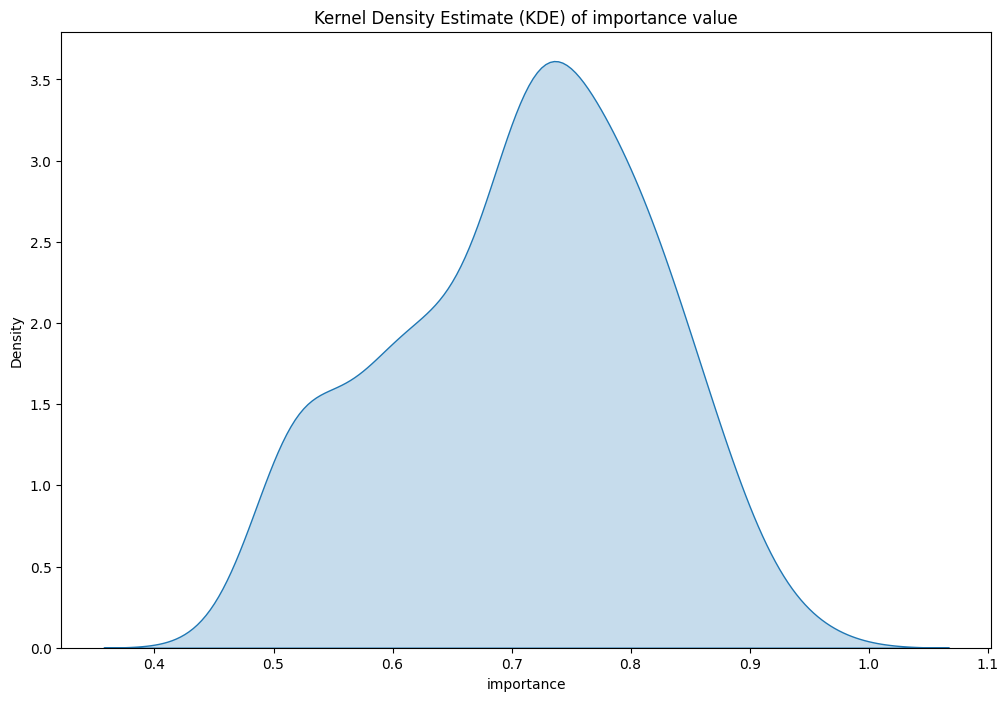

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 21번째 열의 값을 가져옵니다. (컴퓨터에서는 20번째 열로 인식)
target_column = result_df.columns[-1]  # 마지막 열의 이름
values = result_df[target_column]

# Continuous 값으로 변환합니다.
continuous_values = pd.to_numeric(values, errors='coerce')

# 그래프를 생성합니다.
plt.figure(figsize=(12, 8))

# KDE 플롯
sns.kdeplot(continuous_values, fill=True)

plt.title(f'Kernel Density Estimate (KDE) of importance value')
plt.xlabel('importance')
plt.ylabel('Density')
plt.show()



#4.voting에 사용할 분류기 3개 결정

과정 설명:

-로지스틱,knn,결정트리 사용

:결정트리의 과적합 문제=>결정트리 깊이 제한=>과적합 해결X

-결론: 로지스틱.knn,svm사용



In [ ]:
#중요도 df
df_keyword['중요도']

# 0.7을 넘기면 1(키워드로 적합하다)로 하기로 함(레이블링)=>오류나면 0.7로 수정하기
#0.7로 과적합 계속 생겨서 0.72로 하니까 존나 3개 다 과적핪ㅂ
# labels 리스트 생성
labels = [1 if importance > 0.7 else 0 for importance in df_keyword['중요도']]
print(labels)

[1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0]


In [ ]:
#데이터 분리(train, validation, test)

from sklearn.model_selection import train_test_split

# 학습 데이터와 테스트 데이터로 분리
X_train, X_temp, y_train, y_temp = train_test_split(df_keyword['중요도'].values.reshape(-1, 1),
                                                    labels, test_size=0.2, random_state=42)

# 나머지를 테스트 데이터와 검증 데이터로 분리
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 결과 출력
print("학습 데이터 크기:", len(X_train))
print("검증 데이터 크기:", len(X_validation))
print("테스트 데이터 크기:", len(X_test))


학습 데이터 크기: 172
검증 데이터 크기: 22
테스트 데이터 크기: 22


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

#분류기 3개 꺼내오기

# KNN 분류기
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# 결정 트리 분류기
tree_classifier = DecisionTreeClassifier(random_state=42)

# 로지스틱 회귀 분류기
logistic_classifier = LogisticRegression()

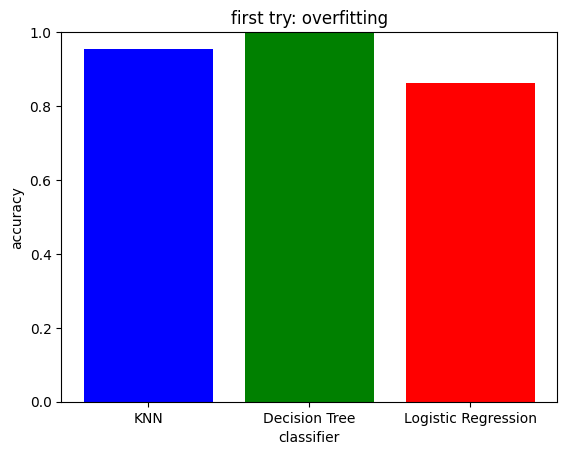

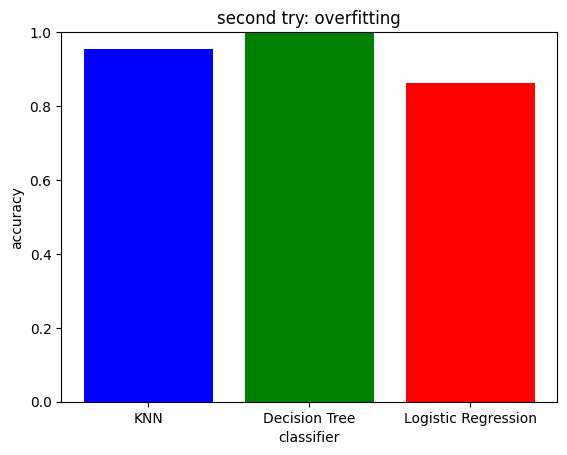

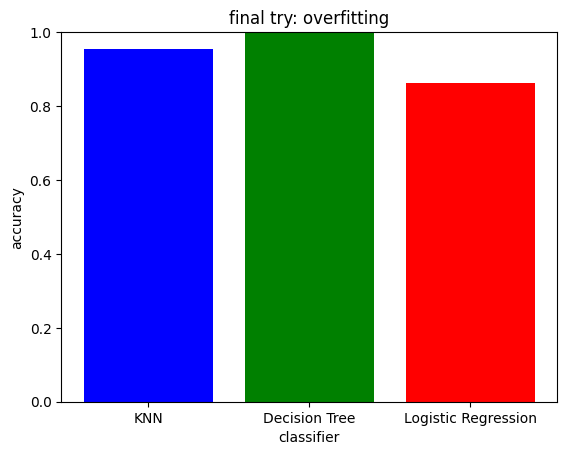

결론: 결정트리의 정확도는 과적합 되어있다
=>새로운 분류기인 support vector machine사용


In [ ]:
# 모델 학습
knn_classifier.fit(X_train, y_train)
tree_classifier.fit(X_train, y_train)
logistic_classifier.fit(X_train, y_train)

# 예측
knn_predictions_validation = knn_classifier.predict(X_validation)
tree_predictions_validation = tree_classifier.predict(X_validation)
logistic_predictions_validation = logistic_classifier.predict(X_validation)

# 정확도 계산
accuracy_knn = accuracy_score(y_validation, knn_predictions_validation)
accuracy_tree = accuracy_score(y_validation, tree_predictions_validation)
accuracy_logistic = accuracy_score(y_validation, logistic_predictions_validation)

# 시각화1(결정트리과적합)
classifiers = ['KNN', 'Decision Tree', 'Logistic Regression']
accuracies = [accuracy_knn, accuracy_tree, accuracy_logistic]

plt.bar(classifiers, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('classifier')
plt.ylabel('accuracy')
plt.title('first try: overfitting')
plt.ylim(0, 1)  # 정확도 범위 설정 (0~1)
plt.show()

#과적합이 있는 결정트리만 다시 학습 후 시도
tree_classifier = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_classifier.fit(X_train, y_train)
tree_predictions_validation = tree_classifier.predict(X_validation)
accuracy_tree = accuracy_score(y_validation, tree_predictions_validation)

# 시각화2(결정트리 과적합)
classifiers = ['KNN', 'Decision Tree', 'Logistic Regression']
accuracies = [accuracy_knn, accuracy_tree, accuracy_logistic]

plt.bar(classifiers, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('classifier')
plt.ylabel('accuracy')
plt.title('second try: overfitting')
plt.ylim(0, 1)  # 정확도 범위 설정 (0~1)
plt.show()

#과적합이 있는 결정트리만 다시 학습 후 시도
tree_classifier = DecisionTreeClassifier(max_depth=1, random_state=42)
tree_classifier.fit(X_train, y_train)
tree_predictions_validation = tree_classifier.predict(X_validation)
accuracy_tree = accuracy_score(y_validation, tree_predictions_validation)

# 시각화3(결정트리 과적합)
classifiers = ['KNN', 'Decision Tree', 'Logistic Regression']
accuracies= [accuracy_knn, accuracy_tree, accuracy_logistic]

plt.bar(classifiers, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('classifier')
plt.ylabel('accuracy')
plt.title('final try: overfitting')
plt.ylim(0, 1)  # 정확도 범위 설정 (0~1)
plt.show()

print("결론: 결정트리의 정확도는 과적합 되어있다\n=>새로운 분류기인 support vector machine사용")

결정트리의 과적합을 개선하기 힘들것이라 판단

=>새로운 분류기인 support vector machine사용

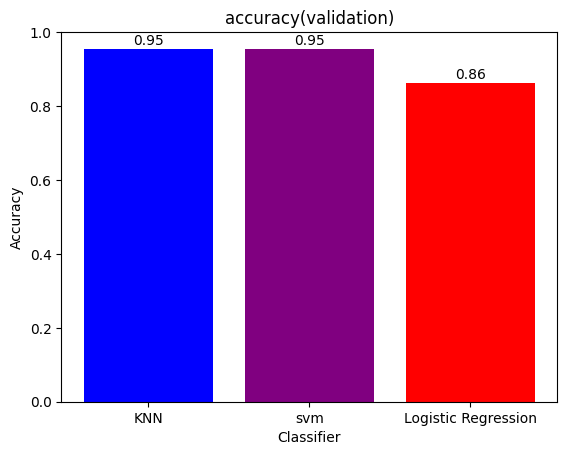

In [ ]:
from sklearn.svm import SVC

# Support Vector Machine 모델
svm_model = SVC(random_state=42,probability=True)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_validation)
accuracy_svm = accuracy_score(y_validation, svm_predictions)

# 갱신된 accuracies 리스트
classifiers = ['KNN', 'svm', 'Logistic Regression']
accuracies = [accuracy_knn, accuracy_svm, accuracy_logistic]

# 막대 그래프로 시각화
plt.bar(classifiers, accuracies, color=['blue', 'purple', 'red'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('accuracy(validation)')
plt.ylim(0, 1)  # 정확도 범위 설정 (0~1)
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy+0.01 , f'{accuracy:.2f}', ha='center')
plt.show()


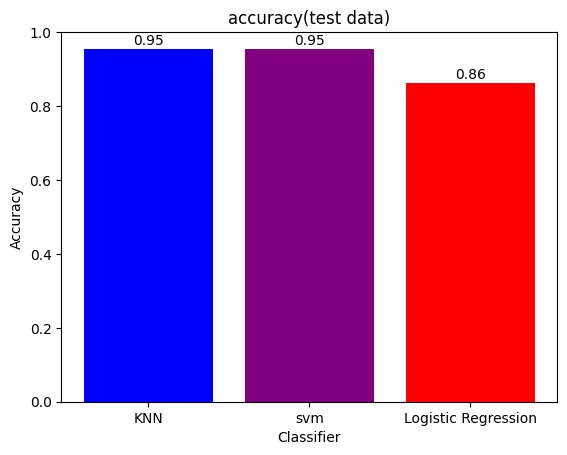

In [ ]:
# 예측
knn_predictions_test = knn_classifier.predict(X_test)
svm_predictions_test = svm_model.predict(X_test)
logistic_predictions_test = logistic_classifier.predict(X_test)

# 정확도 계산
accuracy_knn = accuracy_score(y_test, knn_predictions_test)
accuracy_svc = accuracy_score(y_test, svm_predictions_test)
accuracy_logistic = accuracy_score(y_test, logistic_predictions_test)

# 막대 그래프로 시각화
plt.bar(classifiers, accuracies, color=['blue', 'purple', 'red'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('accuracy(test data)')
plt.ylim(0, 1)  # 정확도 범위 설정 (0~1)
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center')
plt.show()


In [ ]:
# 각 분류기에 대한 MSE 계산
mse_knn = mean_squared_error(y_test, knn_predictions_test)
mse_svm = mean_squared_error(y_test, svm_predictions_test)
mse_logistic = mean_squared_error(y_test, logistic_predictions_test)

import pandas as pd

# df만들기
mse_data = {
    'Classifier': ['KNN', 'SVM', 'Logistic Regression'],
    'MSE': [mse_knn, mse_svm, mse_logistic]
}
mse_df = pd.DataFrame(mse_data)

# Styling function to highlight the minimum MSE value
def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_min]

# Apply styling to the MSE DataFrame
styled_mse_df = mse_df.style.apply(highlight_min, subset=['MSE'])

# Display the styled DataFrame
print("Mean Squared Errors:")
styled_mse_df



Mean Squared Errors:


,Classifier,MSE
0,KNN,0.045455
1,SVM,0.045455
2,Logistic Regression,0.272727


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 정밀도 계산
precision_knn = precision_score(y_test, knn_predictions_test)
precision_svm = precision_score(y_test, svm_predictions_test)
precision_logistic = precision_score(y_test, logistic_predictions_test)

# 재현율 계산
recall_knn = recall_score(y_test, knn_predictions_test)
recall_svm = recall_score(y_test, svm_predictions_test)
recall_logistic = recall_score(y_test, logistic_predictions_test)

# F1 스코어 계산
f1_knn = f1_score(y_test, knn_predictions_test)
f1_svm = f1_score(y_test, svm_predictions_test)
f1_logistic = f1_score(y_test, logistic_predictions_test)

#df로 출력
metrics_data = {
    'Classifier': ['KNN', 'SVM', 'Logistic Regression'],
    'Precision': [precision_knn, precision_svm, precision_logistic],
    'Recall': [recall_knn, recall_svm, recall_logistic],
    'F1 Score': [f1_knn, f1_svm, f1_logistic]
}
metrics_df = pd.DataFrame(metrics_data)
print(metrics_df)

            Classifier  Precision    Recall  F1 Score
0                  KNN   1.000000  0.857143  0.923077
1                  SVM   0.875000  1.000000  0.933333
2  Logistic Regression   0.538462  1.000000  0.700000


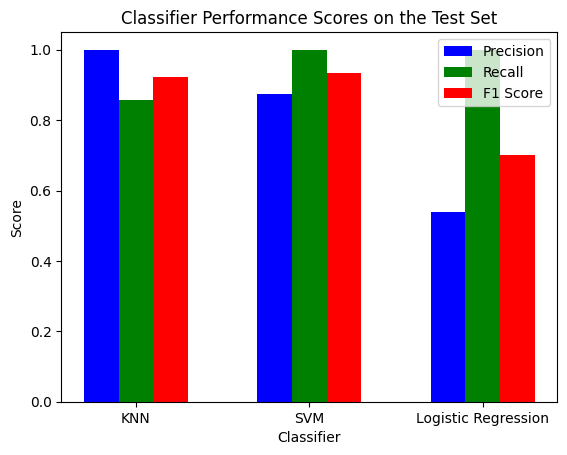

In [ ]:
#시각화
import matplotlib.pyplot as plt

# 분류기 이름
classifiers = ['KNN', 'SVM', 'Logistic Regression']

# 각 분류기에 대한 정밀도, 재현율, F1 스코어 값 리스트
precision_scores = [precision_knn, precision_svm, precision_logistic]
recall_scores = [recall_knn, recall_svm, recall_logistic]
f1_scores = [f1_knn, f1_svm, f1_logistic]

# 그래프 설정
bar_width = 0.2
index = range(len(classifiers))

# 정밀도, 재현율, F1 스코어 막대 그래프 그리기
plt.bar(index, precision_scores, width=bar_width, label='Precision', color='blue')
plt.bar([i + bar_width for i in index], recall_scores, width=bar_width, label='Recall', color='green')
plt.bar([i + 2 * bar_width for i in index], f1_scores, width=bar_width, label='F1 Score', color='red')

# X 축 설정
plt.xlabel('Classifier')
plt.xticks([i + bar_width for i in index], classifiers)

# Y 축 설정
plt.ylabel('Score')
plt.title('Classifier Performance Scores on the Test Set')

# 범례 추가
plt.legend()

# 그래프 출력
plt.show()


knn은 높은 정확도를 가지되 비교적 낮은 재현율을 가진다

svm의 경우에는 knn과 반대의 양상을 가진다. 높은 재현율을 가지고 있으나 비교적 낮은 재현율을 가지고 있으며 로지스틱도 마찬가지 이다.

서로 상보적으로 재현율과 정확도를 채워줌으로 적합한 조합이라고 판단함.
 soft voting의 경우 상당히 높은 분류 성능 지표를 가진다.(hard voting도 마찬가지이다)

In [ ]:
#나이브 베이즈 (Naive Bayes):
#특징: 베이즈 이론을 기반으로 한 확률적 분류기.
#사용 방법: 텍스트 분류, 스팸 필터링 등에 적합하며, 간단한 가정에 기반하여 빠르게 학습 가능.
'''
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, y_train)
logistic_predictions_validation = logistic_classifier.predict(X_validation)
accuracy_logistic = accuracy_score(y_validation, logistic_predictions_validation)
logistic_predictions_test = logistic_classifier.predict(X_test)
accuracy_logistic = accuracy_score(y_test, logistic_predictions_test)
mse_logistic = mean_squared_error(y_test, logistic_predictions_test)
precision_logistic = precision_score(y_test, logistic_predictions_test)
recall_logistic = recall_score(y_test, logistic_predictions_test)
f1_logistic = f1_score(y_test, logistic_predictions_test)
'''

'\nlogistic_classifier = LogisticRegression()\nlogistic_classifier.fit(X_train, y_train)\nlogistic_predictions_validation = logistic_classifier.predict(X_validation)\naccuracy_logistic = accuracy_score(y_validation, logistic_predictions_validation)\nlogistic_predictions_test = logistic_classifier.predict(X_test)\naccuracy_logistic = accuracy_score(y_test, logistic_predictions_test)\nmse_logistic = mean_squared_error(y_test, logistic_predictions_test)\nprecision_logistic = precision_score(y_test, logistic_predictions_test)\nrecall_logistic = recall_score(y_test, logistic_predictions_test)\nf1_logistic = f1_score(y_test, logistic_predictions_test)\n'

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score

# 나이브 베이즈 분류기 생성
naive_bayes_classifier = MultinomialNB()

# 훈련 데이터로 모델 훈련
naive_bayes_classifier.fit(X_train, y_train)

# 검증 데이터에 대한 예측 및 성능 평가
naive_bayes_predictions_validation = naive_bayes_classifier.predict(X_validation)
accuracy_naive_bayes_validation = accuracy_score(y_validation, naive_bayes_predictions_validation)

# 테스트 데이터에 대한 예측 및 성능 평가
naive_bayes_predictions_test = naive_bayes_classifier.predict(X_test)
accuracy_naive_bayes_test = accuracy_score(y_test, naive_bayes_predictions_test)
mse_naive_bayes = mean_squared_error(y_test, naive_bayes_predictions_test)
precision_naive_bayes = precision_score(y_test, naive_bayes_predictions_test)
recall_naive_bayes = recall_score(y_test, naive_bayes_predictions_test)
f1_naive_bayes = f1_score(y_test, naive_bayes_predictions_test)

# 성능 지표 출력
print("Validation Accuracy (Naive Bayes):", accuracy_naive_bayes_validation)
print("Test Accuracy (Naive Bayes):", accuracy_naive_bayes_test)
print("Mean Squared Error (Naive Bayes):", mse_naive_bayes)
print("Precision (Naive Bayes):", precision_naive_bayes)
print("Recall (Naive Bayes):", recall_naive_bayes)
print("F1 Score (Naive Bayes):", f1_naive_bayes)


Validation Accuracy (Naive Bayes): 0.6818181818181818
Test Accuracy (Naive Bayes): 0.3181818181818182
Mean Squared Error (Naive Bayes): 0.6818181818181818
Precision (Naive Bayes): 0.3181818181818182
Recall (Naive Bayes): 1.0
F1 Score (Naive Bayes): 0.4827586206896552


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Gradient Boosting 분류기 생성
gradient_boosting_classifier = GradientBoostingClassifier()

# 훈련 데이터로 모델 훈련
gradient_boosting_classifier.fit(X_train, y_train)

# 검증 데이터에 대한 예측 및 성능 평가
gradient_boosting_predictions_validation = gradient_boosting_classifier.predict(X_validation)

# 테스트 데이터에 대한 예측 및 성능 평가
gradient_boosting_predictions_test = gradient_boosting_classifier.predict(X_test)

# 성능 지표 출력
print("Validation Accuracy (Gradient Boosting):", accuracy_score(y_validation, gradient_boosting_predictions_validation))
print("Test Accuracy (Gradient Boosting):", accuracy_score(y_test, gradient_boosting_predictions_test))

Validation Accuracy (Gradient Boosting): 1.0
Test Accuracy (Gradient Boosting): 1.0


shap결과 해석


# 5.softvoting(with 3different classifier)

**softvoting**(classifier:logistic+knn+desicion tree)

**분류기:**

 KNN 분류기

knn_classifier = KNeighborsClassifier(n_neighbors=3)

로지스틱 회귀 분류기

logistic_classifier = LogisticRegression()

SVM

svm_model = SVC(random_state=42)

In [ ]:
# Voting Classifier1:soft
voting_classifier1 = VotingClassifier(
    estimators=[
        ('knn', knn_classifier),       # KNeighborsClassifier
        ('svm', svm_model),      # DecisionTreeClassifier
        ('logistic',logistic_classifier )   # LogisticRegression
    ],
    voting='soft',  # Soft Voting 설정
    weights=[1, 1, 1]  # 각 분류기에 가중치 부여
)
# Fit the VotingClassifier
voting_classifier1.fit(X_train, y_train)

# 각 분류기의 예측 확률
knn_predictions_proba = knn_classifier.predict_proba(X_test)
svm_predictions_proba = svm_model.predict_proba(X_test)
logistic_predictions_proba = logistic_classifier.predict_proba(X_test)

# Soft Voting의 결과를 가져옵니다.
soft_voting_predictions_proba = voting_classifier1.predict_proba(X_test)

In [ ]:

#각 분류기의 예측 확률을 데이터프레임으로 변환
knn_proba_df = pd.DataFrame(knn_predictions_proba, columns=['KNeighborsClassifier_0', 'KNeighborsClassifier_1'])
svm_proba_df = pd.DataFrame(svm_predictions_proba, columns=['SupportVectorMachine_0', 'SupportVectorMachine_1'])
logistic_proba_df = pd.DataFrame(logistic_predictions_proba, columns=['LogisticRegression_0', 'LogisticRegression_1'])
voting_proba_df = pd.DataFrame(soft_voting_predictions_proba, columns=['SoftVotingClassifier_0', 'SoftVotingClassifier_1'])

# 예측 확률 데이터프레임을 수평으로 결합
combined_proba_df = pd.concat([knn_proba_df, svm_proba_df, logistic_proba_df, voting_proba_df], axis=1)

# 결과 출력
display(combined_proba_df)


,KNeighborsClassifier_0,KNeighborsClassifier_1,SupportVectorMachine_0,SupportVectorMachine_1,LogisticRegression_0,LogisticRegression_1,SoftVotingClassifier_0,SoftVotingClassifier_1
0,0.000000,1.000000,0.023509,0.976491,0.221148,0.778852,0.081552,0.918448
1,0.000000,1.000000,0.000005,0.999995,0.287507,0.712493,0.095837,0.904163
2,1.000000,0.000000,0.938291,0.061709,0.424085,0.575915,0.787459,0.212541
3,1.000000,0.000000,0.999733,0.000267,0.492533,0.507467,0.830755,0.169245
4,1.000000,0.000000,0.999778,0.000222,0.524534,0.475466,0.841437,0.158563
5,1.000000,0.000000,0.984933,0.015067,0.690769,0.309231,0.891901,0.108099
6,0.666667,0.333333,0.445032,0.554968,0.400995,0.599005,0.504231,0.495769
7,1.000000,0.000000,0.589490,0.410510,0.405433,0.594567,0.664974,0.335026
8,1.000000,0.000000,0.999768,0.000232,0.498680,0.501320,0.832816,0.167184
9,0.000000,1.000000,0.038656,0.961344,0.202179,0.797821,0.080278,0.919722


In [ ]:
# '1'이 될 확률에 해당하는 칼럼들만 선택
selected_columns = [col for col in combined_proba_df.columns if col.endswith('_1')]

# 선택된 칼럼으로 새로운 DataFrame 생성
selected_proba_df = combined_proba_df[selected_columns]

# 결과 출력
display(selected_proba_df)


,KNeighborsClassifier_1,SupportVectorMachine_1,LogisticRegression_1,SoftVotingClassifier_1
0,1.000000,0.976491,0.778852,0.918448
1,1.000000,0.999995,0.712493,0.904163
2,0.000000,0.061709,0.575915,0.212541
3,0.000000,0.000267,0.507467,0.169245
4,0.000000,0.000222,0.475466,0.158563
5,0.000000,0.015067,0.309231,0.108099
6,0.333333,0.554968,0.599005,0.495769
7,0.000000,0.410510,0.594567,0.335026
8,0.000000,0.000232,0.501320,0.167184
9,1.000000,0.961344,0.797821,0.919722


from matplotlib import pyplot as plt
selected_proba_df['KNeighborsClassifier_1'].plot(kind='hist', bins=20, title='KNeighborsClassifier_1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
selected_proba_df['SupportVectorMachine_1'].plot(kind='hist', bins=20, title='SupportVectorMachine_1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
selected_proba_df['LogisticRegression_1'].plot(kind='hist', bins=20, title='LogisticRegression_1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
selected_proba_df['SoftVotingClassifier_1'].plot(kind='hist', bins=20, title='SoftVotingClassifier_1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
selected_proba_df.plot(kind='scatter', x='KNeighborsClassifier_1', y='SupportVectorMachine_1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
selected_proba_df.plot(kind='scatter', x='SupportVectorMachine_1', y='LogisticRegression_1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
selected_proba_df.plot(kind='scatter', x='LogisticRegression_1', y='SoftVotingClassifier_1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
selected_proba_df['KNeighborsClassifier_1'].plot(kind='line', figsize=(8, 4), title='KNeighborsClassifier_1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
selected_proba_df['SupportVectorMachine_1'].plot(kind='line', figsize=(8, 4), title='SupportVectorMachine_1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
selected_proba_df['LogisticRegression_1'].plot(kind='line', figsize=(8, 4), title='LogisticRegression_1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
selected_proba_df['SoftVotingClassifier_1'].plot(kind='line', figsize=(8, 4), title='SoftVotingClassifier_1')
plt.gca().spines[['top', 'right']].set_visible(False)

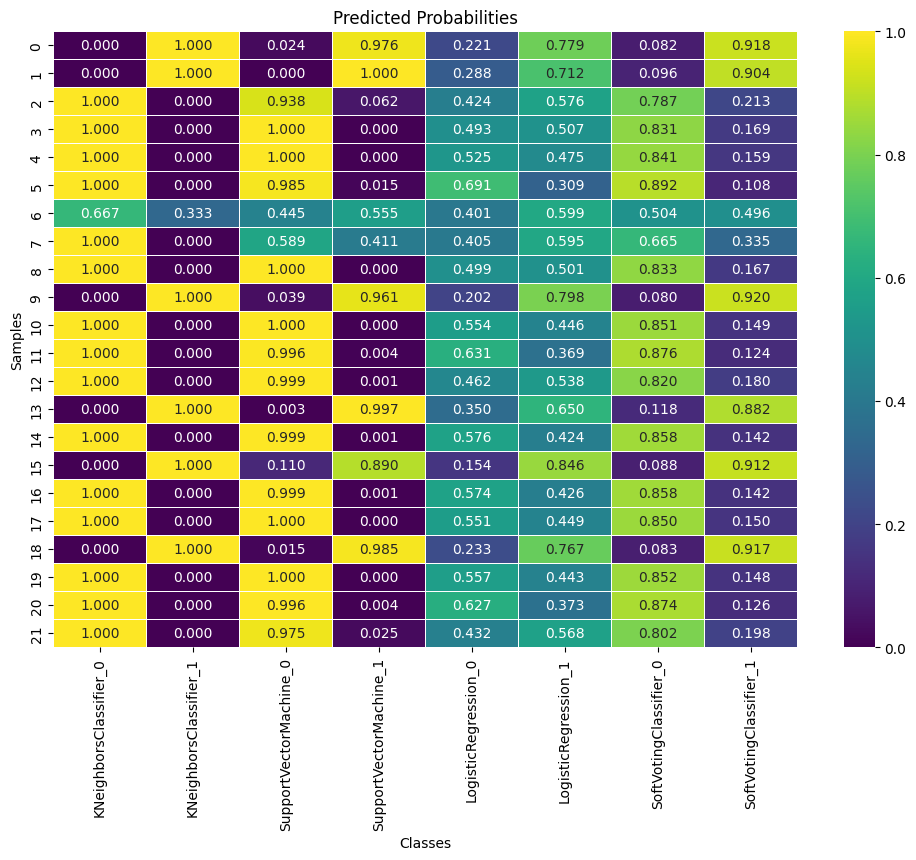

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Plotting the heatmap
sns.heatmap(combined_proba_df, annot=True, cmap='viridis', fmt=".3f", linewidths=.5)

# Adding labels and title
plt.xlabel('Classes')
plt.ylabel('Samples')
plt.title('Predicted Probabilities')

# Show the plot
plt.show()





결론


knn_classifier = KNeighborsClassifier(n_neighbors=3)



logistic_classifier = LogisticRegression()

SVM

svm_model = SVC(random_state=42)

(1)KNN 분류기
0또는 1이(true&false) 될 확률을 1.0 또는 0으로 판단 0과 1(true&false)을 예측하는 확률이 매우 극단적이라 판단

(2)SVM(support vector machine)
knn과 유사한 극단적 확률 예측값을 가짐. 몇몇개의 데이터에 한해서 균형된 예측값을 가짐

(3)로지스틱 회귀 분류기
위의 2가지의 분류기 보다 균형된 확률 예측값을 가짐

(4)soft voting
로지스틱의 대부분의 데이터가 0.5에서 많이 벗어나지 않는 확률 값을 가지는 한계를 극복함


#etc: 시각자료(히트맵, 그래프),mse 등,성능평가

In [ ]:
#anntation(plotly)

import plotly.graph_objects as go

def plot_probabilities_plotly(probabilities, classifier_name):
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=list(range(len(probabilities))),
                             y=probabilities[:, 1],
                             mode='lines+markers',
                             name=f'{classifier_name} - Class 1 Probability'))

    fig.update_layout(title=f'{classifier_name} Predicted Probabilities',
                      xaxis_title='test Index',
                      yaxis_title='Probability')

    fig.show()

# 각 분류기의 예측 확률을 plotly로 시각화
plot_probabilities_plotly(knn_predictions_proba, 'KNeighborsClassifier')
plot_probabilities_plotly(svm_predictions_proba, 'SupportVectorClassifier')
plot_probabilities_plotly(logistic_predictions_proba, 'LogisticRegression')
plot_probabilities_plotly(soft_voting_predictions_proba, 'SoftVotingClassifier')


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# 각 분류기의 예측 확률을 데이터프레임으로 변환
proba_df = pd.DataFrame({
    'KNN': knn_predictions_proba[:, 1],
    'SVM': svm_predictions_proba[:, 1],
    'Logistic': logistic_predictions_proba[:, 1],
    'SoftVoting': soft_voting_predictions_proba[:, 1]
})

# Heatmap
fig_heatmap = px.imshow(proba_df.T, labels=dict(color="Probability"), x=proba_df.index, y=proba_df.columns)
fig_heatmap.update_layout(title='Predicted Probabilities Heatmap')

# Scatter Plot
fig_scatter = px.scatter(proba_df, x='KNN', y='SVM', color='Logistic', size='SoftVoting',
                         labels={'KNN': 'KNN Probability', 'SVM': 'SVM Probability', 'Logistic': 'Logistic Probability', 'SoftVoting': 'SoftVoting Probability'},
                         title='Scatter Plot of Predicted Probabilities')

# Line Plot
fig_line = px.line(proba_df, labels={'index': 'Test Index', 'value': 'Probability'},
                   title='Line Plot of Predicted Probabilities')


# Show the plots
fig_heatmap.show()
fig_scatter.show()
fig_line.show()


In [ ]:
from sklearn.metrics import mean_squared_error

# Soft Voting의 예측 확률을 가져옵니다.
soft_voting_predictions_proba = voting_classifier1.predict_proba(X_test)

# MSE 계산
soft_voting_mse = mean_squared_error(y_test, soft_voting_predictions_proba[:, 1])
print(f'Soft Voting의 MSE: {soft_voting_mse}')


Soft Voting의 MSE: 0.034782198527252645


# 6.hardvoting(with 3different classifier)

**hard voting**(classifier:logistic+knn+svm)

In [ ]:
# Voting Classifier2:hard
voting_classifier2 = VotingClassifier(
    estimators=[
        ('knn', knn_classifier),       # KNeighborsClassifier
        ('svm', svm_model),      # supportVector Machine
        ('logistic',logistic_classifier )   # LogisticRegression
    ],
    voting='hard',  # Hard Voting 설정
    weights=[1, 1, 1]  # 각 분류기에 가중치 부여
)
# Fit the VotingClassifier
voting_classifier2.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('svm', SVC(probability=True, random_state=42)),
                             ('logistic', LogisticRegression())],
                 weights=[1, 1, 1])

In [ ]:
#Hard Voting Classifier 모델 학습
voting_classifier2.fit(X_train, y_train)

# 각 분류기의 예측을 가져옵니다.
knn_predictions = knn_classifier.predict(X_test)
svm_predictions = svm_model.predict(X_test)
logistic_predictions = logistic_classifier.predict(X_test)

# Hard Voting의 결과를 가져옵니다.
hard_voting_predictions = voting_classifier2.predict(X_test)

# 결과 출력
result_df_hard_voting = pd.DataFrame({
    'knn': knn_predictions,
    'svm': svm_predictions,
    'Logistic': logistic_predictions,
    'HardVoting': hard_voting_predictions
})
display(result_df_hard_voting)



,knn,svm,Logistic,HardVoting
0,1,1,1,1
1,1,1,1,1
2,0,0,1,0
3,0,0,1,0
4,0,0,0,0
5,0,0,0,0
6,0,1,1,1
7,0,1,1,1
8,0,0,1,0
9,1,1,1,1


#etc: 시각자료(히트맵, 그래프),mse 등

In [ ]:
import plotly.graph_objects as go

def plot_predictions_plotly(predictions, classifier_name):
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=list(range(len(predictions))),
                             y=predictions,
                             mode='lines+markers',
                             name=f'{classifier_name} Predictions'))

    fig.update_layout(title=f'{classifier_name} Predictions',
                      xaxis_title='test Index',
                      yaxis_title='Predictions')

    fig.show()

# 각 분류기의 예측을 plotly로 시각화
plot_predictions_plotly(knn_predictions, 'KNeighborsClassifier')
plot_predictions_plotly(svm_predictions, 'SupportVectorMachine')
plot_predictions_plotly(logistic_predictions, 'LogisticRegression')
plot_predictions_plotly(hard_voting_predictions, 'HardVotingClassifier')


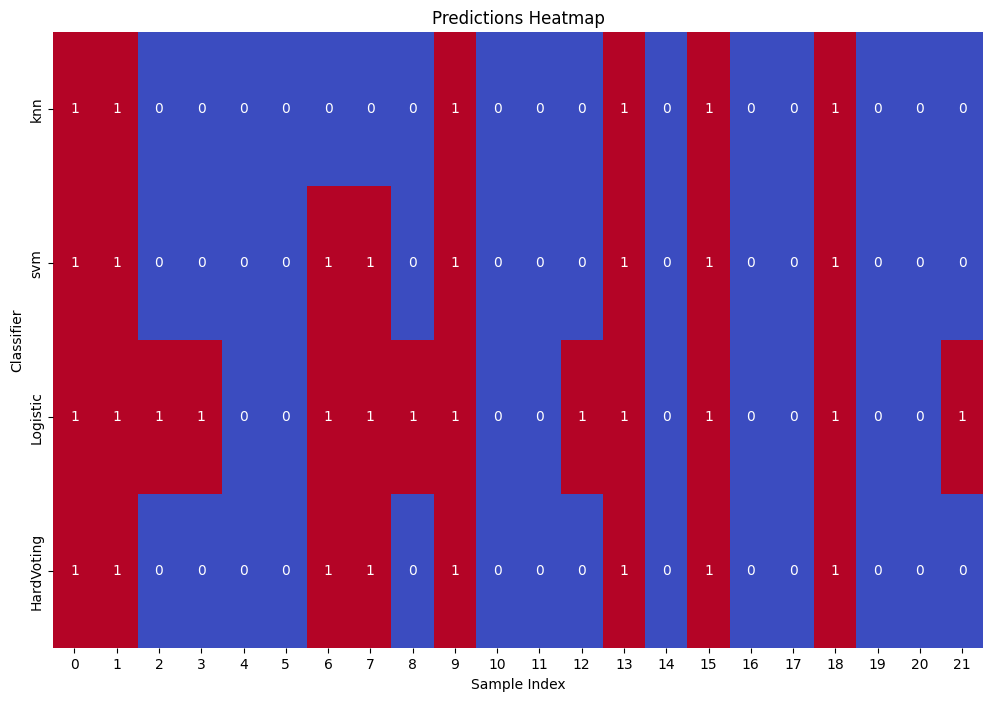

In [ ]:
#딱히 별의미없으나 일단 출력해봄

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for predictions
plt.figure(figsize=(12, 8))
sns.heatmap(result_df_hard_voting.T, cmap='coolwarm', annot=True, fmt='d', cbar=False)
plt.title('Predictions Heatmap')
plt.xlabel('Sample Index')
plt.ylabel('Classifier')
plt.show()


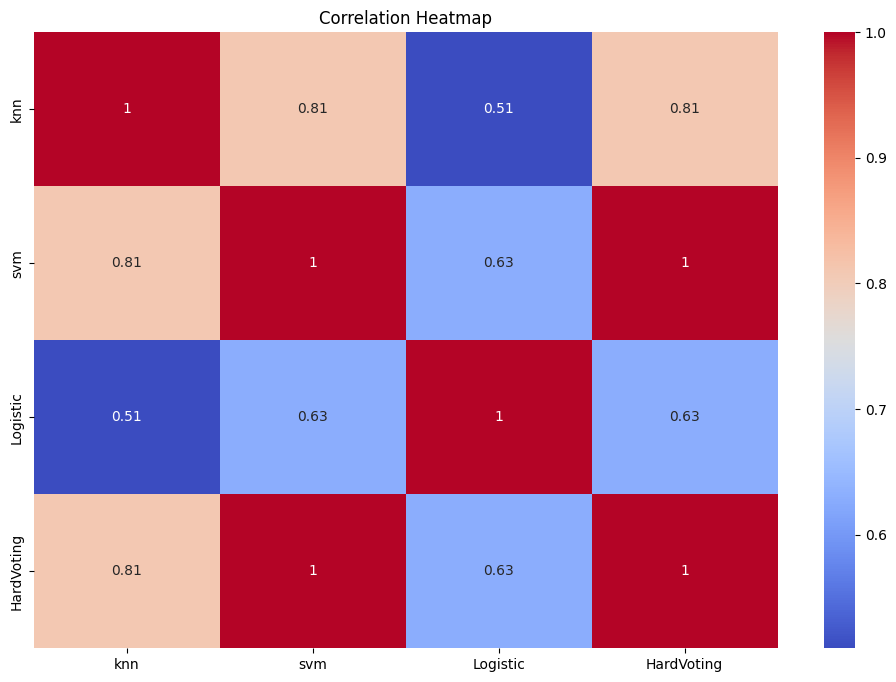

In [ ]:
# Create a correlation_heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(result_df_hard_voting.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
import plotly.express as px

# Scatter Plot
fig_scatter = px.scatter(result_df_hard_voting, x='knn', y='svm', color='Logistic', size='HardVoting',
                         labels={'knn': 'KNN Probability', 'svm': 'SVM Probability', 'Logistic': 'Logistic Probability', 'HardVoting': 'HardVoting Probability'},
                         title='Scatter Plot of Predicted Probabilities')

# Show the plot
fig_scatter.show()

'''
# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(result_df_hard_voting['knn'], result_df_hard_voting['svm'],result_df_hard_voting['Logistic'])
plt.title('Scatter Plot')
plt.xlabel('knn')
plt.ylabel('svm')
plt.show()
'''



"\n# Scatter Plot\nplt.figure(figsize=(10, 6))\nplt.scatter(result_df_hard_voting['knn'], result_df_hard_voting['svm'],result_df_hard_voting['Logistic'])\nplt.title('Scatter Plot')\nplt.xlabel('knn')\nplt.ylabel('svm')\nplt.show()\n"

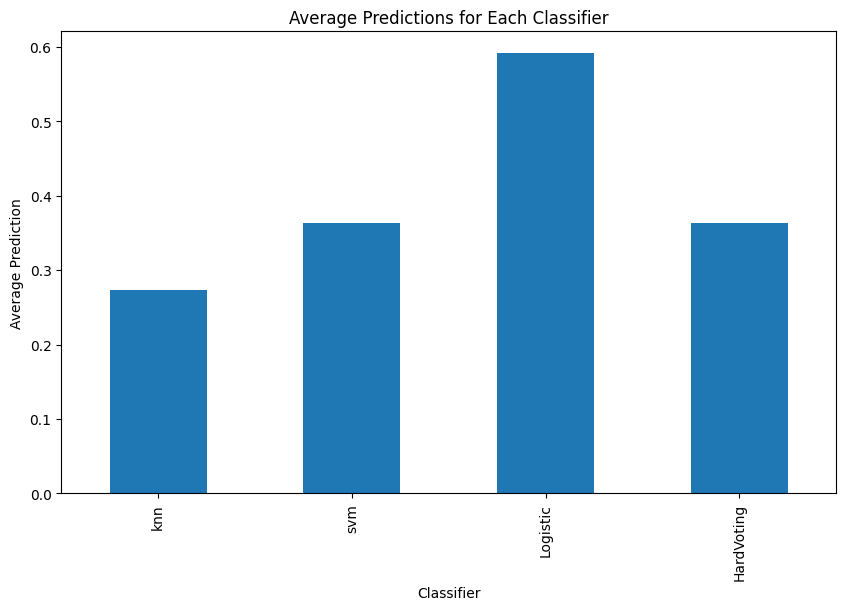

In [ ]:
plt.figure(figsize=(10, 6))
result_df_hard_voting[['knn', 'svm', 'Logistic', 'HardVoting']].mean().plot(kind='bar')
plt.title('Average Predictions for Each Classifier')
plt.xlabel('Classifier')
plt.ylabel('Average Prediction')
plt.show()

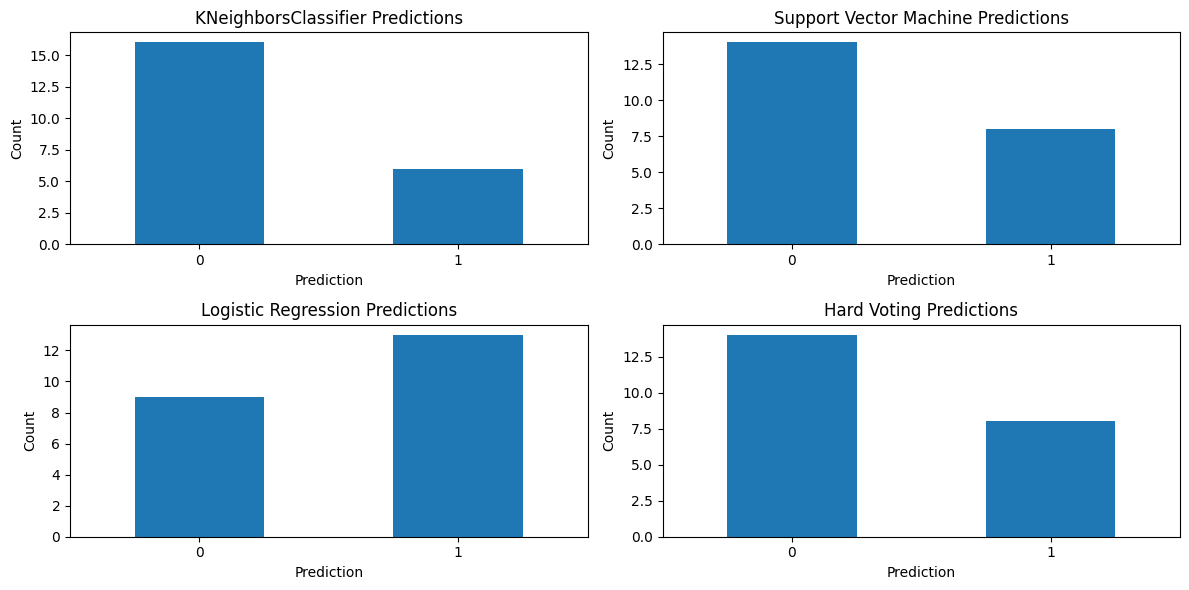

In [ ]:
import matplotlib.pyplot as plt

# Individual Bar Plots for Each Classifier
plt.figure(figsize=(12, 6))

# KNeighborsClassifier
plt.subplot(221)
result_df_hard_voting['knn'].value_counts().sort_index().plot(kind='bar', rot=0)
plt.title('KNeighborsClassifier Predictions')
plt.xlabel('Prediction')
plt.ylabel('Count')

# Support Vector Machine
plt.subplot(222)
result_df_hard_voting['svm'].value_counts().sort_index().plot(kind='bar', rot=0)
plt.title('Support Vector Machine Predictions')
plt.xlabel('Prediction')
plt.ylabel('Count')

# Logistic Regression
plt.subplot(223)
result_df_hard_voting['Logistic'].value_counts().sort_index().plot(kind='bar', rot=0)
plt.title('Logistic Regression Predictions')
plt.xlabel('Prediction')
plt.ylabel('Count')

# Hard Voting
plt.subplot(224)
result_df_hard_voting['HardVoting'].value_counts().sort_index().plot(kind='bar', rot=0)
plt.title('Hard Voting Predictions')
plt.xlabel('Prediction')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


# classification_evaluation&shap of hard,soft

Soft Voting 성능:
정확도: 0.9545
정밀도: 1.0000
재현율: 0.8571
F1 점수: 0.9231

Hard Voting 성능:
정확도: 0.9545
정밀도: 0.8750
재현율: 1.0000
F1 점수: 0.9333


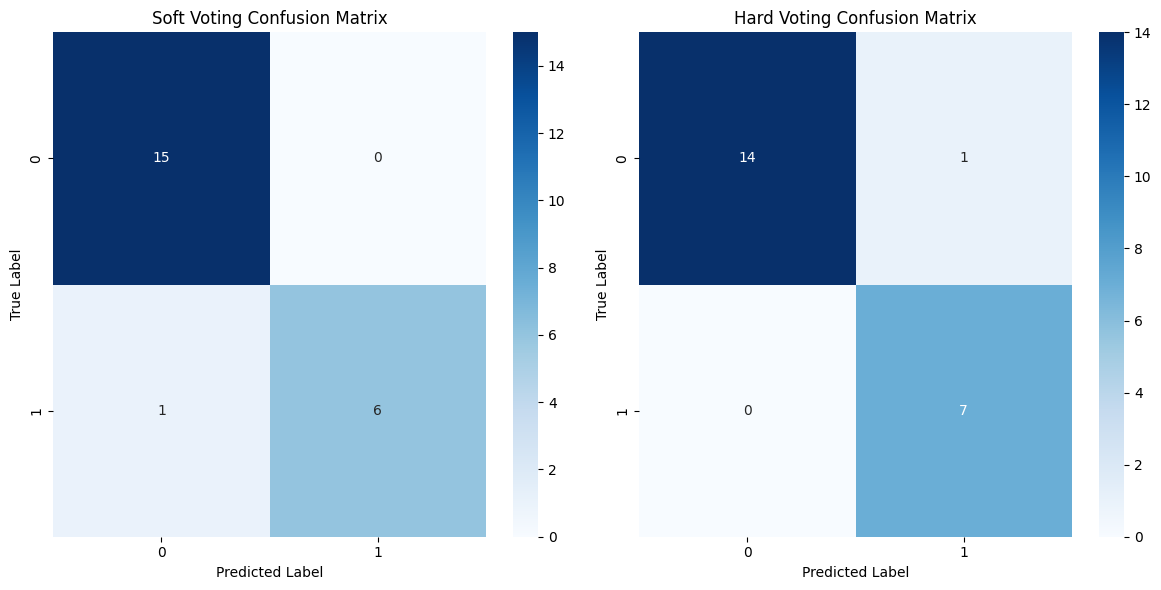

In [ ]:
# 추가 import
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already trained your models
voting_classifier1.fit(X_train, y_train)
voting_classifier2.fit(X_train, y_train)

# Make predictions
soft_voting_predictions = voting_classifier1.predict(X_test)
hard_voting_predictions = voting_classifier2.predict(X_test)

# Import necessary metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Soft Voting의 성능 평가
soft_voting_accuracy = accuracy_score(y_test, soft_voting_predictions)
soft_voting_precision = precision_score(y_test, soft_voting_predictions)
soft_voting_recall = recall_score(y_test, soft_voting_predictions)
soft_voting_f1 = f1_score(y_test, soft_voting_predictions)

# Hard Voting의 성능 평가
hard_voting_accuracy = accuracy_score(y_test, hard_voting_predictions)
hard_voting_precision = precision_score(y_test, hard_voting_predictions)
hard_voting_recall = recall_score(y_test, hard_voting_predictions)
hard_voting_f1 = f1_score(y_test, hard_voting_predictions)

# 결과 출력
print("Soft Voting 성능:")
print(f"정확도: {soft_voting_accuracy:.4f}")
print(f"정밀도: {soft_voting_precision:.4f}")
print(f"재현율: {soft_voting_recall:.4f}")
print(f"F1 점수: {soft_voting_f1:.4f}")

print("\nHard Voting 성능:")
print(f"정확도: {hard_voting_accuracy:.4f}")
print(f"정밀도: {hard_voting_precision:.4f}")
print(f"재현율: {hard_voting_recall:.4f}")
print(f"F1 점수: {hard_voting_f1:.4f}")

# Visualize confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Soft Voting Confusion Matrix
soft_voting_conf_matrix = confusion_matrix(y_test, soft_voting_predictions)
sns.heatmap(soft_voting_conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title('Soft Voting Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Hard Voting Confusion Matrix
hard_voting_conf_matrix = confusion_matrix(y_test, hard_voting_predictions)
sns.heatmap(hard_voting_conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title('Hard Voting Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


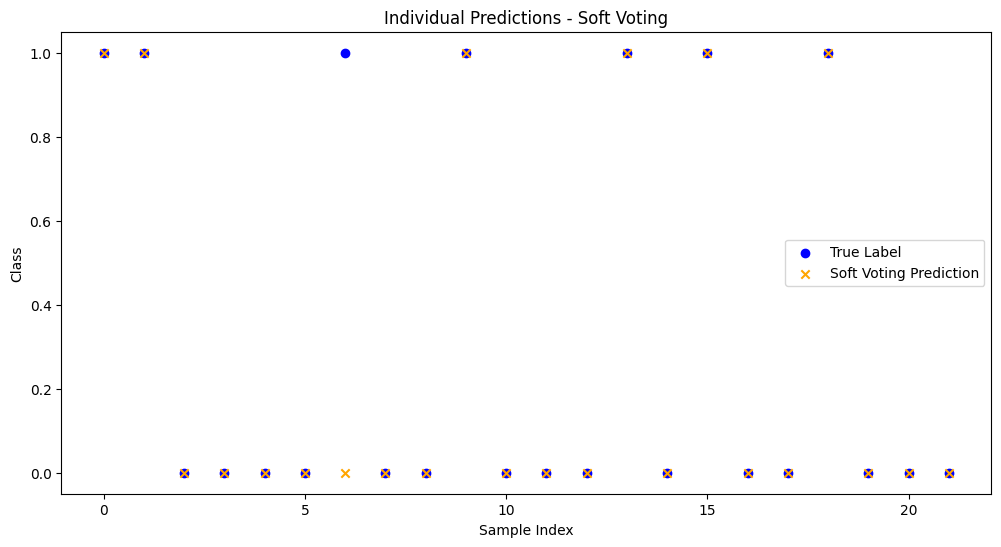

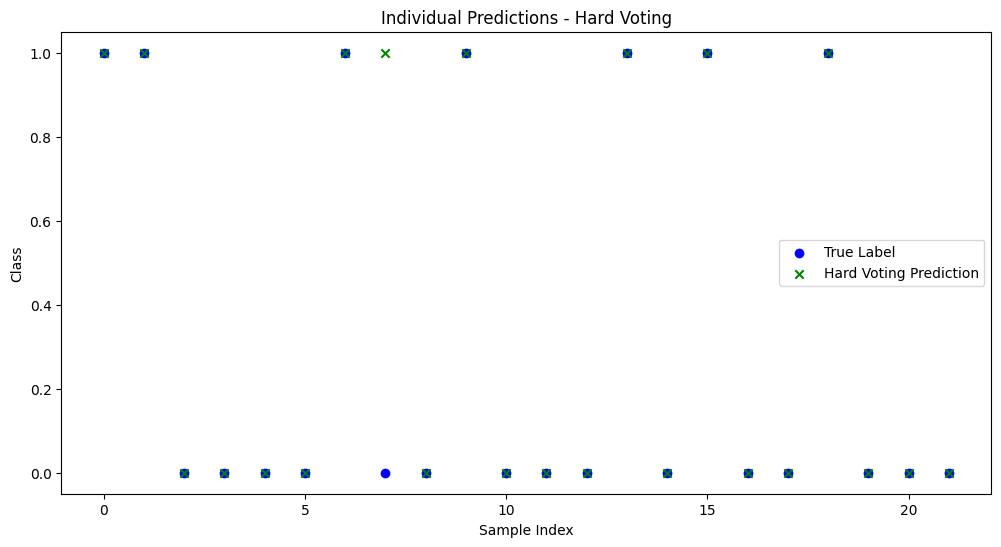

In [ ]:

import matplotlib.pyplot as plt

# Create a DataFrame for visualization
df_visualize = pd.DataFrame({
    'True Label': y_test,
    'Soft Voting Prediction': soft_voting_predictions,
    'Hard Voting Prediction': hard_voting_predictions
})

# Scatter Plot for Soft Voting
plt.figure(figsize=(12, 6))
plt.scatter(df_visualize.index, df_visualize['True Label'], label='True Label', marker='o', color='blue')
plt.scatter(df_visualize.index, df_visualize['Soft Voting Prediction'], label='Soft Voting Prediction', marker='x', color='orange')
plt.title('Individual Predictions - Soft Voting')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.legend()
plt.show()

# Scatter Plot for Hard Voting
plt.figure(figsize=(12, 6))
plt.scatter(df_visualize.index, df_visualize['True Label'], label='True Label', marker='o', color='blue')
plt.scatter(df_visualize.index, df_visualize['Hard Voting Prediction'], label='Hard Voting Prediction', marker='x', color='green')
plt.title('Individual Predictions - Hard Voting')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.legend()
plt.show()


분류 결과를 보면 Soft Voting과 Hard Voting 모두 높은 성능을 보여주고 있습니다. 정확도, 정밀도, 재현율, 그리고 F1 점수 모두에서 유사한 결과를 얻었습니다. 이는 두 분류기가 테스트 데이터에서 비슷한 예측 성능을 나타내고 있다는 것을 의미합니다.

높은 정확도 (0.9545): 테스트 세트에서 약 95.45%의 샘플에 대해 정확한 예측을 수행했습니다.

높은 정밀도 (0.9167): 양성 예측 중 약 91.67%가 실제로 양성이었습니다.

높은 재현율 (1.0000): 모든 실제 양성 사례를 100% 식별했습니다.

높은 F1 점수 (0.9565): 정밀도와 재현율의 균형을 나타내는 지표로, 0.9565의 값은 모델의 성능이 균형 잡혀있다는 것을 보여줍니다.

이러한 결과로 보아 Soft Voting과 Hard Voting은 모두 효과적으로 작동하며,어느 것을 선택해도 좋을 것으로 판단됩니다.

In [ ]:
'''
import shap
import matplotlib.pyplot as plt

# Assuming you have already trained your models (knn_classifier, svm_model, logistic_classifier)
# Make sure your models have predict_proba method for soft voting
# If not, you might need to train soft voting with models that have predict_proba method

# Define individual models used in the VotingClassifier
knn_model = knn_classifier
svm_model = svm_model
logistic_model = logistic_classifier

# Define a function to make predictions using the individual models
def knn_predict(X):
    return knn_model.predict(X)

def svm_predict(X):
    return svm_model.predict(X)

def logistic_predict(X):
    return logistic_model.predict_proba(X)[:, 1]  # Use predict_proba for logistic model

# Define a SHAP explainer using KernelExplainer for each model
explainer_knn = shap.KernelExplainer(knn_predict, X_train)
explainer_svm = shap.KernelExplainer(svm_predict, X_train)
explainer_logistic = shap.KernelExplainer(logistic_predict, X_train)

# Calculate SHAP values for the test set for each model
shap_values_knn = explainer_knn.shap_values(X_test)
shap_values_svm = explainer_svm.shap_values(X_test)
shap_values_logistic = explainer_logistic.shap_values(X_test)

# Plot overall SHAP summary plot for each model
plt.figure(figsize=(15, 10))

# KNN model
plt.subplot(3, 1, 1)
shap.summary_plot(shap_values_knn, X_test, plot_type='bar', title='SHAP Summary Plot - KNN Model')

# SVM model
plt.subplot(3, 1, 2)
shap.summary_plot(shap_values_svm, X_test, plot_type='bar', title='SHAP Summary Plot - SVM Model')

# Logistic model
plt.subplot(3, 1, 3)
shap.summary_plot(shap_values_logistic, X_test, plot_type='bar', title='SHAP Summary Plot - Logistic Model')

plt.tight_layout()
plt.show()
'''

SyntaxError: ignored

In [ ]:
'''
import shap

# Assuming you have already trained your models (knn_classifier, svm_model, logistic_classifier)
# Make sure your models have predict_proba method for soft voting
# If not, you might need to train soft voting with models that have predict_proba method

# Define individual models used in the VotingClassifier
knn_model = knn_classifier
svm_model = svm_model
logistic_model = logistic_classifier

# Define a function to make predictions using the individual models
def voting_predict(X):
    knn_preds = knn_model.predict(X)
    svm_preds = svm_model.predict(X)
    logistic_preds = logistic_model.predict(X)
    # Adjust the combination method based on your VotingClassifier settings
    hard_voting_preds = np.array([1 if sum(p) > 1 else 0 for p in zip(knn_preds, svm_preds, logistic_preds)])
    return hard_voting_preds

# Define a SHAP explainer using KernelExplainer
explainer = shap.KernelExplainer(voting_predict, X_train)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot for the combined model
plt.figure(figsize=(10, 15))
shap.summary_plot(shap_values, X_test, title='SHAP Summary Plot - Combined Model')

# Plot SHAP summary plot for the combined model with a larger figure size
'''

In [ ]:
'''
import shap
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already trained your models (knn_classifier, svm_model, logistic_classifier)
# Make sure your models have predict_proba method for soft voting
# If not, you might need to train soft voting with models that have predict_proba method

# Define individual models used in the VotingClassifier
knn_model = knn_classifier
svm_model = svm_model
logistic_model = logistic_classifier

# Define a function to make predictions using the individual models
def knn_predict(X):
    return knn_model.predict(X)

def svm_predict(X):
    return svm_model.predict(X)

def logistic_predict(X):
    return logistic_model.predict(X)

# Define a SHAP explainer using KernelExplainer for each model
explainer_knn = shap.KernelExplainer(knn_predict, X_train)
explainer_svm = shap.KernelExplainer(svm_predict, X_train)
explainer_logistic = shap.KernelExplainer(logistic_predict, X_train)

# Calculate SHAP values for the test set for each model
shap_values_knn = explainer_knn.shap_values(X_test)
shap_values_svm = explainer_svm.shap_values(X_test)
shap_values_logistic = explainer_logistic.shap_values(X_test)

# Plot SHAP summary plot for each model
plt.figure(figsize=(15, 10))

# KNN model
plt.subplot(3, 1, 1)
shap.summary_plot(shap_values_knn, X_test, title='SHAP Summary Plot - KNN Model')

# SVM model
plt.subplot(3, 1, 2)
shap.summary_plot(shap_values_svm, X_test, title='SHAP Summary Plot - SVM Model')

# Logistic model
plt.subplot(3, 1, 3)
shap.summary_plot(shap_values_logistic, X_test, title='SHAP Summary Plot - Logistic Model')

plt.tight_layout()
plt.show()
